In [1]:
# import deep learning libraries
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# import image display library
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

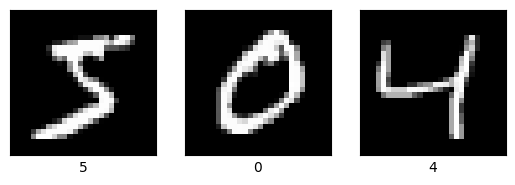

In [3]:
plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))
    plt.imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
plt.show()

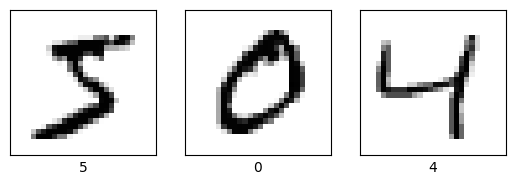

In [4]:
def transform(img):
    return 255 - img

transformed_x_train = transform(x_train)
transformed_x_test = transform(x_test)

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(y_train[i]))
    plt.imshow(transformed_x_train[i], cmap='gray', vmin=0, vmax=255)
plt.show()

In [41]:
def get_model(classes, filters, kernels=None, paddings='same', dropout=0.25, input_shape=x_train.shape[1:]):
    if kernels is None:
        kernels = [(3,3) for _ in filters]
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(*input_shape, 1)))
    for filter, kernel in zip(filters, kernels):
        model.add(keras.layers.SeparableConv2D(filter, kernel, (1,1), paddings, kernel_initializer='he_uniform'))
        model.add(keras.layers.ReLU())
        model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(64, kernel_initializer='he_uniform'))
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dropout(dropout))

    model.add(keras.layers.Dense(classes, kernel_initializer='he_uniform'))
    return model

In [42]:
model = get_model(10, [64, 128])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_19 (Separ  (None, 28, 28, 64)        137       
 ableConv2D)                                                     
                                                                 
 re_lu_29 (ReLU)             (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_20 (Separ  (None, 14, 14, 128)       8896      
 ableConv2D)                                                     
                                                                 
 re_lu_30 (ReLU)             (None, 14, 14, 128)       0         
                                                      

In [43]:
model.compile(
    optimizer=keras.optimizers.RMSprop(
        keras.optimizers.schedules.PiecewiseConstantDecay([3000, 6000], [1e-4, 1e-5, 1e-6]),
        momentum=0.9
        ),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='sparse_categorical_accuracy'
    )

In [44]:
model.fit(x_train, y_train, batch_size=64, epochs=6, validation_split=0.2)

Epoch 1/6
750/750 [==============================] - 68s 89ms/step - loss: 0.3685 - sparse_categorical_accuracy: 0.8912 - val_loss: 0.0829 - val_sparse_categorical_accuracy: 0.9746
Epoch 2/6
750/750 [==============================] - 65s 87ms/step - loss: 0.1355 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.0664 - val_sparse_categorical_accuracy: 0.9807
Epoch 3/6
750/750 [==============================] - 64s 86ms/step - loss: 0.1030 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.0771 - val_sparse_categorical_accuracy: 0.9797
Epoch 4/6
750/750 [==============================] - 69s 92ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.0657 - val_sparse_categorical_accuracy: 0.9822
Epoch 5/6
750/750 [==============================] - 67s 89ms/step - loss: 0.0578 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0524 - val_sparse_categorical_accuracy: 0.9862
Epoch 6/6
750/750 [==============================] - 67s 89ms/step - loss: 0.0497 - sparse_cate

In [45]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9856


[0.04489101096987724, 0.9855999946594238]

In [64]:
model.save('base_model.keras')

In [65]:
reloaded = keras.models.load_model('base_model.keras')

In [66]:
reloaded.evaluate(x_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9856


[0.04489101096987724, 0.9855999946594238]